<a href="https://colab.research.google.com/github/kartika-nair/SDS-Project/blob/master/PopulationAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

Exploratory Data Analysis

In [3]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/PopulationDataset.csv")

#to know the columns and the header of the dataset
df.head()

,Year,Country,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop %,World Population,Country Global Rank
0,2020,China,1439323776,0.39,5540090,-348399.0,38.4,1.69,153,60.8,875075919.0,18.47,7794798739,1
1,2019,China,1433783686,0.43,6135900,-348399.0,37.0,1.65,153,59.7,856409297.0,18.59,7713468100,1
2,2018,China,1427647786,0.47,6625995,-348399.0,37.0,1.65,152,58.6,837022095.0,18.71,7631091040,1
3,2017,China,1421021791,0.49,6972440,-348399.0,37.0,1.65,151,57.5,816957613.0,18.83,7547858925,1
4,2016,China,1414049351,0.51,7201481,-348399.0,37.0,1.65,151,56.3,796289491.0,18.94,7464022049,1


In [4]:
#finding the missing values
print(df.isnull().sum())

Year                                0
Country                             0
Population                          0
Yearly % Change                     0
Yearly Change                       0
Migrants (net)                    595
Median Age                        595
Fertility Rate                    595
Density (P/Km²)                     0
Urban Pop %                       113
Urban Population                  113
Country's Share of World Pop %      0
World Population                    0
Country Global Rank                 0
dtype: int64


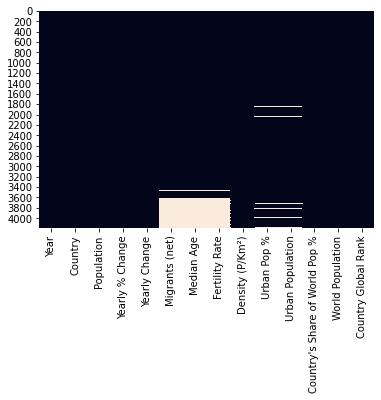

In [5]:
#missing data heatmap
sns.heatmap(df.isnull(), cbar=False)

In [6]:
#splitting the dataframe based on the countries (Making a dataframe dictionary)

Cnt = df.Country.unique()
DataFrameDict = {elem : pd.DataFrame for elem in Cnt}
for key in DataFrameDict.keys():
  DataFrameDict[key] = df[:][df.Country == key]

In [7]:
#remaning the columns to allow selection
d = {"Urban Pop %": 10, "Urban Population":11 }
df = df.rename(columns=d)

#interpolating the values for urban population and urban population percentage
cols=[10,11]
df[cols] = df[cols].interpolate()

#changing the column names back to the original ones
m = {10:"Urban Pop %",11:"Urban Population"}
df = df.rename(columns=m)

#dropping NaN values that can't be computed
df=df.dropna()

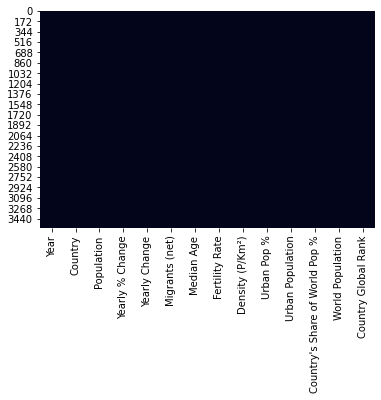

In [8]:
#checking for missing values using a heatmap
sns.heatmap(df.isnull(), cbar=False)

In [9]:
#Density column is of type object, hence converting to float

def convert_me(val):
  new_val = val.replace(',','')
  return float(new_val)

df['Density (P/Km²)'].apply(convert_me)

0       153.0
1       153.0
2       152.0
3       151.0
4       151.0
        ...  
3612    142.0
3613    146.0
3614    133.0
3615    123.0
3616    113.0
Name: Density (P/Km²), Length: 3600, dtype: float64

Graph Visualization

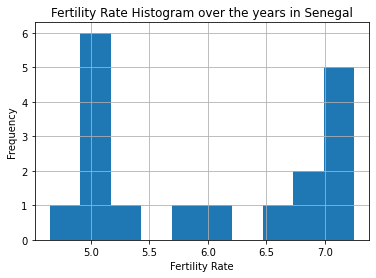

In [48]:
#Fertility Rate Histogram over the years in Senegal

df2 = df[df['Country']=='Senegal'].iloc[::-1]

df2.hist(column = 'Fertility Rate')
plt.xlabel('Fertility Rate')
plt.ylabel('Frequency')
plt.title('Fertility Rate Histogram over the years in Senegal')

plt.show()

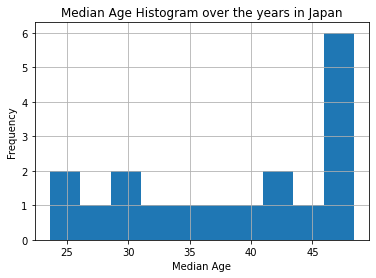

In [47]:
#Median Age Histogram over the years in Japan

df3 = df[df['Country']=='Japan'].iloc[::-1]

df3.hist(column = 'Median Age')
plt.xlabel('Median Age')
plt.ylabel('Frequency')
plt.title('Median Age Histogram over the years in Japan')

plt.show()

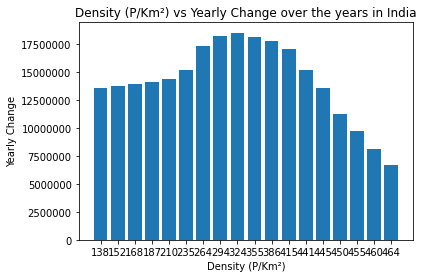

In [50]:
#Bar Chart for Density (P/Km²) vs Yearly Change over the years in India

x = df[df['Country']=='India']['Density (P/Km²)'].iloc[::-1]
y = df[df['Country']=='India']['Yearly Change']

plt.xlabel('Density (P/Km²)')
plt.ylabel('Yearly Change')
plt.title('Density (P/Km²) vs Yearly Change over the years in India')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.bar(x,y)

plt.show()

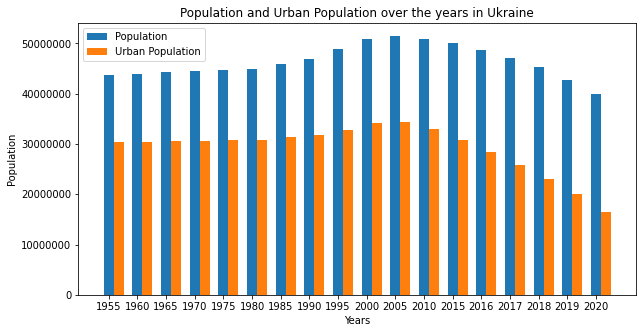

In [13]:
#Bar Chart for Population and Urban Population over the years in Ukraine

barWidth = 0.35
r1 = np.arange(len(df[df['Country']=='India']['Population']))
r2 = [x + barWidth for x in r1]

labels = np.arange(1955, 2020, 5)
labels = np.append(labels, [2016, 2017, 2018, 2019, 2020])
x= np.arange(len(labels))

fig, ax = plt.subplots(figsize = (10, 5))

rect1= ax.bar(r1, df[df['Country']=='Ukraine']['Population'], width = barWidth, label='Population')
rec2= ax.bar(r2, df[df['Country']=='Ukraine']['Urban Population'], width = barWidth, label='Urban Population')

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)

ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.set_xlabel('Years')
ax.set_ylabel('Population')
ax.set_title('Population and Urban Population over the years in Ukraine')

plt.show()

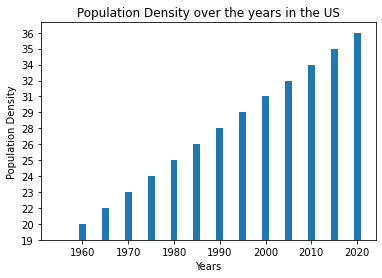

In [14]:
#Bar Chart for Population Density over the years in the USA

x = df[df['Country'] == 'United States']['Year'][::-1]
x.drop([37, 38, 39,40], axis = 0,inplace=True)

y = df[df['Country'] == 'United States']['Density (P/Km²)'][::-1]
y.drop([37, 38, 39,40], axis = 0,inplace=True)

plt.bar(x,y, width = 1.5)

plt.xlabel('Years')
plt.ylabel('Population Density')
plt.title('Population Density over the years in the US')

plt.show()

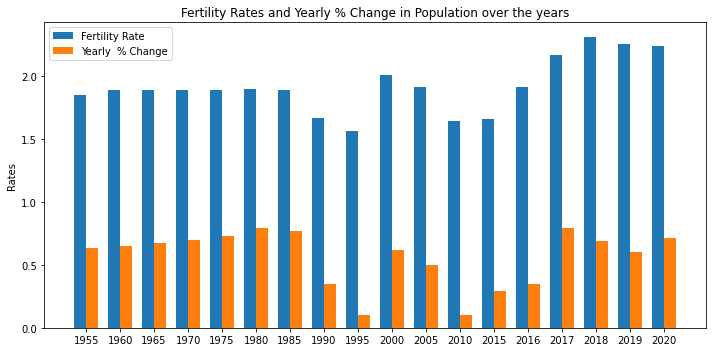

In [15]:
#Bar Chart for Fertility Rate vs Yearly % Change in Sweden

labels = np.arange(1955, 2020, 5)
labels = np.append(labels, [2016, 2017, 2018, 2019, 2020])

x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize = (10, 5))

rect1 = ax.bar(x-width/2, df[df['Country'] == 'Sweden']['Fertility Rate'], width, label = 'Fertility Rate')
rect2 = ax.bar(x+width/2, df[df['Country'] == 'Sweden']['Yearly % Change'], width, label = 'Yearly  % Change')

ax.set_ylabel('Rates')
ax.set_title('Fertility Rates and Yearly % Change in Population over the years')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

We see a fall in fertility rate as well as yearly % change in the 1990s, this was due to the economic crisis faced by the country during the 90s. The decrease in fertility rate in the 2010s was linked to the rising uncertainty with respect to the future, due to an increase in crime as well as climate threats.   

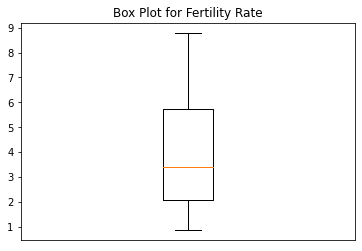

In [16]:
#Box Plot for Fertility Rate of all countries

plt.boxplot(df['Fertility Rate'])
plt.title('Box Plot for Fertility Rate')
plt.xticks([])
plt.show()

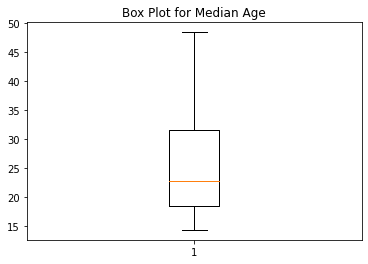

In [17]:
#Box Plot for Median Age of all countries

plt.boxplot(df['Median Age'])
plt.title('Box Plot for Median Age')

plt.show()

Normalization and Standardization

In [18]:
df1 = df[df.Country == 'India']
df1.head()

,Year,Country,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop %,World Population,Country Global Rank
18,2020,India,1380004385,0.99,13586631,-532687.0,28.4,2.24,464,35.0,483098640.0,17.70,7794798739,2
19,2019,India,1366417754,1.02,13775474,-532687.0,27.1,2.36,460,34.5,471828295.0,17.71,7713468100,2
20,2018,India,1352642280,1.04,13965495,-532687.0,27.1,2.36,455,34.1,460779764.0,17.73,7631091040,2
21,2017,India,1338676785,1.07,14159536,-532687.0,27.1,2.36,450,33.6,449963381.0,17.74,7547858925,2
22,2016,India,1324517249,1.10,14364846,-532687.0,27.1,2.36,445,33.2,439391699.0,17.75,7464022049,2


In [19]:
def getZscore(array):
  return (array - array.mean(axis=0)) / array.std(axis=0)

def getPvalue(array):
  return scipy.stats.norm.sf(abs(array)) *2

def normalize(array):
  newArray = (array - array.min()) / (array.max() - array.min())
  return newArray

def getValues(array):
  values = {'mean':array.mean(), 'variance':array.var(), 'normalized': normalize(array), 'z-score': getZscore(array)}
  normArr = values['normalized']
  values['normMean'] = round(normArr.mean(), 3)
  values['normVar'] = round(normArr.var(), 3)
  values['pValue']: getPvalue(values['z-score'])
  zscoreArr =  values['z-score']
  values['stdMean'] = round(zscoreArr.mean(), 3)
  values['stdVar'] = round(zscoreArr.var(), 3)
  return values

pop = getValues(np.array(list(df1['Population'])))
percChange = getValues(np.array(list(df1['Yearly % Change'])))
change = getValues(np.array(list(df1['Yearly Change'])))
migrants = getValues(np.array(list(df1['Migrants (net)'])))
medianAge = getValues(np.array(list(df1['Median Age'])))
fertility = getValues(np.array(list(df1['Fertility Rate'])))
density = getValues(np.array(list(df1['Density (P/Km²)'])).astype(np.float))
urbanPopPerc = getValues(np.array(list(df1['Urban Pop %'])))
urbanPop = getValues(np.array(list(df1['Urban Population'])))
worldPopShare = getValues(np.array(list(df1['Country\'s Share of World Pop %'])))
worldPop = getValues(np.array(list(df1['World Population'])))

In [20]:
print('MEAN')
print('Population:', pop['mean'])
print('Yearly % Change:', percChange['mean'])
print('Yearly Change:', change['mean'])
print('Migrants (net):', migrants['mean'])
print('Median Age:', medianAge['mean'])
print('Fertility Rate:', fertility['mean'])
print('Density (P/Km²):', density['mean'])
print('Urban Pop %:', urbanPopPerc['mean'])
print('Urban Population:', urbanPop['mean'])
print('Country\'s Share of World Pop %:', worldPopShare['mean'])
print('World Population:', worldPop['mean'])

print('\n')

print('VARIANCE')
print('Population:', pop['variance'])
print('Yearly % Change:', percChange['variance'])
print('Yearly Change:', change['variance'])
print('Migrants (net):', migrants['variance'])
print('Median Age:', medianAge['variance'])
print('Fertility Rate:', fertility['variance'])
print('Density (P/Km²):', density['variance'])
print('Urban Pop %:', urbanPopPerc['variance'])
print('Urban Population:', urbanPop['variance'])
print('Country\'s Share of World Pop %:', worldPopShare['variance'])
print('World Population:', worldPop['variance'])

MEAN
Population: 964957501.5
Yearly % Change: 1.6888888888888889
Yearly Change: 14256523.555555556
Migrants (net): -203260.27777777778
Median Age: 23.244444444444444
Fertility Rate: 3.8927777777777783
Density (P/Km²): 324.6111111111111
Urban Pop %: 26.950000000000003
Urban Population: 280986976.5
Country's Share of World Pop %: 16.59222222222222
World Population: 5694505592.888889


VARIANCE
Population: 1.2068984568142062e+17
Yearly % Change: 0.24167654320987653
Yearly Change: 11443868561851.246
Migrants (net): 88804804485.64507
Median Age: 10.156913580246915
Fertility Rate: 1.9945978395061732
Density (P/Km²): 13624.682098765434
Urban Pop %: 36.441388888888895
Urban Population: 2.1961694692320596e+16
Country's Share of World Pop %: 1.3780506172839506
World Population: 3.01335681756436e+18


In [21]:
print('NORMALIZED MEAN')
print('Population:', pop['normMean'])
print('Yearly % Change:', percChange['normMean'])
print('Yearly Change:', change['normMean'])
print('Migrants (net):', migrants['normMean'])
print('Median Age:', medianAge['normMean'])
print('Fertility Rate:', fertility['normMean'])
print('Density (P/Km²):', density['normMean'])
print('Urban Pop %:', urbanPopPerc['normMean'])
print('Urban Population:', urbanPop['normMean'])
print('Country\'s Share of World Pop %:', worldPopShare['normMean'])
print('World Population:', worldPop['normMean'])

print('\n')

print('NORMALIZED VARIANCE')
print('Population:', pop['normVar'])
print('Yearly % Change:', percChange['normVar'])
print('Yearly Change:', change['normVar'])
print('Migrants (net):', migrants['normVar'])
print('Median Age:', medianAge['normVar'])
print('Fertility Rate:', fertility['normVar'])
print('Density (P/Km²):', density['normVar'])
print('Urban Pop %:', urbanPopPerc['normVar'])
print('Urban Population:', urbanPop['normVar'])
print('Country\'s Share of World Pop %:', worldPopShare['normVar'])
print('World Population:', worldPop['normVar'])

NORMALIZED MEAN
Population: 0.572
Yearly % Change: 0.522
Yearly Change: 0.638
Migrants (net): 0.345
Median Age: 0.433
Fertility Rate: 0.452
Density (P/Km²): 0.572
Urban Pop %: 0.537
Urban Population: 0.508
Country's Share of World Pop %: 0.61
World Population: 0.582


NORMALIZED VARIANCE
Population: 0.128
Yearly % Change: 0.135
Yearly Change: 0.082
Migrants (net): 0.098
Median Age: 0.123
Fertility Rate: 0.149
Density (P/Km²): 0.128
Urban Pop %: 0.12
Urban Population: 0.13
Country's Share of World Pop %: 0.156
World Population: 0.119


In [22]:
print('STANDARDIZED MEAN')
print('Population:', pop['stdMean'])
print('Yearly % Change:', percChange['stdMean'])
print('Yearly Change:', change['stdMean'])
print('Migrants (net):', migrants['stdMean'])
print('Median Age:', medianAge['stdMean'])
print('Fertility Rate:', fertility['stdMean'])
print('Density (P/Km²):', density['stdMean'])
print('Urban Pop %:', urbanPopPerc['stdMean'])
print('Urban Population:', urbanPop['stdMean'])
print('Country\'s Share of World Pop %:', worldPopShare['stdMean'])
print('World Population:', worldPop['stdMean'])

print('\n')

print('STANDARDIZED VARIANCE')
print('Population:', pop['stdVar'])
print('Yearly % Change:', percChange['stdVar'])
print('Yearly Change:', change['stdVar'])
print('Migrants (net):', migrants['stdVar'])
print('Median Age:', medianAge['stdVar'])
print('Fertility Rate:', fertility['stdVar'])
print('Density (P/Km²):', density['stdVar'])
print('Urban Pop %:', urbanPopPerc['stdVar'])
print('Urban Population:', urbanPop['stdVar'])
print('Country\'s Share of World Pop %:', worldPopShare['stdVar'])
print('World Population:', worldPop['stdVar'])

STANDARDIZED MEAN
Population: -0.0
Yearly % Change: -0.0
Yearly Change: -0.0
Migrants (net): -0.0
Median Age: 0.0
Fertility Rate: -0.0
Density (P/Km²): 0.0
Urban Pop %: -0.0
Urban Population: 0.0
Country's Share of World Pop %: 0.0
World Population: -0.0


STANDARDIZED VARIANCE
Population: 1.0
Yearly % Change: 1.0
Yearly Change: 1.0
Migrants (net): 1.0
Median Age: 1.0
Fertility Rate: 1.0
Density (P/Km²): 1.0
Urban Pop %: 1.0
Urban Population: 1.0
Country's Share of World Pop %: 1.0
World Population: 1.0


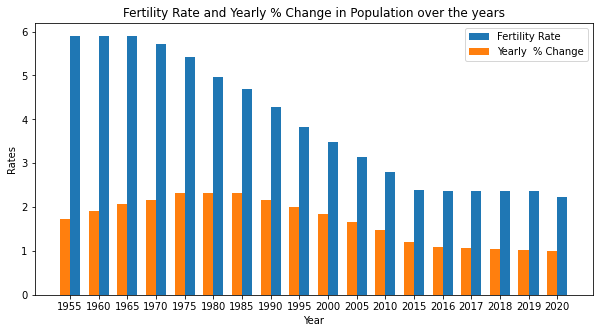

In [23]:
labels = np.array(df1['Year'])

x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize = (10, 5))

rect1 = ax.bar(x-width/2, df1['Fertility Rate'], width, label = 'Fertility Rate')
rect2 = ax.bar(x+width/2, df1['Yearly % Change'], width, label = 'Yearly  % Change')

ax.set_ylabel('Rates')
ax.set_xlabel('Year')
ax.set_title('Fertility Rate and Yearly % Change in Population over the years')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.invert_xaxis()
ax.legend()

plt.show()

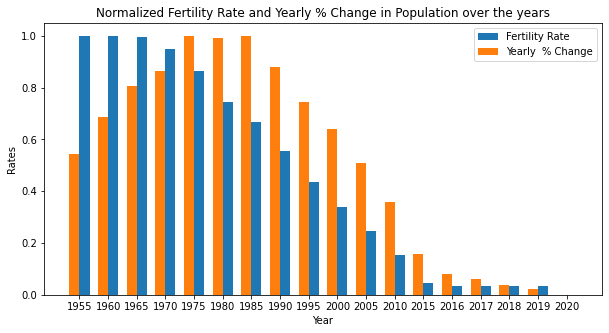

In [24]:
labels = np.array(df1['Year'])

x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize = (10, 5))

rect1 = ax.bar(x-width/2, fertility['normalized'], width, label = 'Fertility Rate')
rect2 = ax.bar(x+width/2, percChange['normalized'], width, label = 'Yearly  % Change')

ax.set_ylabel('Rates')
ax.set_xlabel('Year')
ax.set_title('Normalized Fertility Rate and Yearly % Change in Population over the years')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.invert_xaxis()
ax.legend()

plt.show()

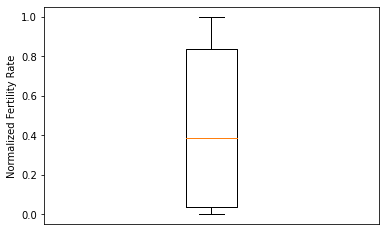

In [25]:
plt.boxplot(fertility['normalized'])
plt.xticks([])
plt.ylabel('Normalized Fertility Rate')
plt.show()

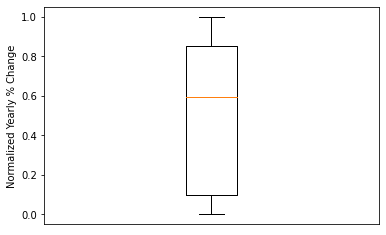

In [26]:
plt.boxplot(percChange['normalized'])
plt.xticks([])
plt.ylabel('Normalized Yearly % Change')
plt.show()

Correlation Plots 

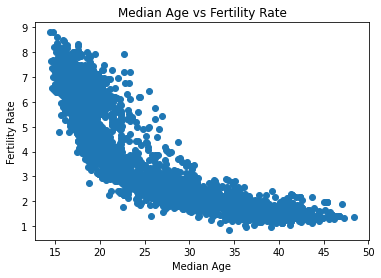

In [27]:
#Median Age vs Fertility Rate Worldwide

plt.scatter(df['Median Age'], df['Fertility Rate'])
plt.xlabel('Median Age')
plt.ylabel('Fertility Rate')
plt.title('Median Age vs Fertility Rate')
plt.show()

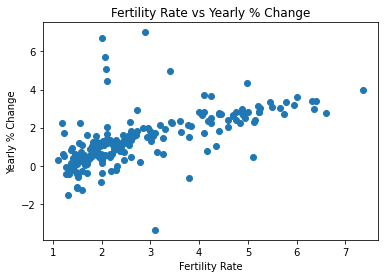

In [28]:
#Fertility Rate and Yearly % Change for 2015 

x = df[df['Year'] == 2015]['Fertility Rate']
y = df[df['Year'] == 2015]['Yearly % Change']

plt.scatter(x, y) 
plt.xlabel('Fertility Rate')
plt.ylabel('Yearly % Change')
plt.title('Fertility Rate vs Yearly % Change')
plt.show()

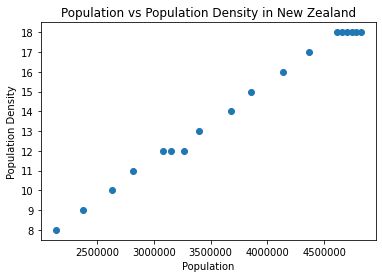

In [30]:
df_nz = DataFrameDict['New Zealand'].iloc[::-1]

plt.scatter(df_nz['Population'],df_nz['Density (P/Km²)'])
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)

plt.xlabel('Population')
plt.ylabel('Population Density')
plt.title('Population vs Population Density in New Zealand')
plt.show()

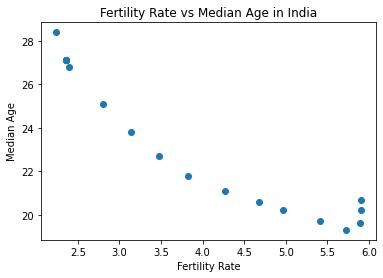

In [31]:
df_india = df[df['Country']=='India']

plt.scatter(df_india['Fertility Rate'],df_india['Median Age'])
plt.xlabel('Fertility Rate')
plt.ylabel('Median Age')
plt.title('Fertility Rate vs Median Age in India')
plt.show()

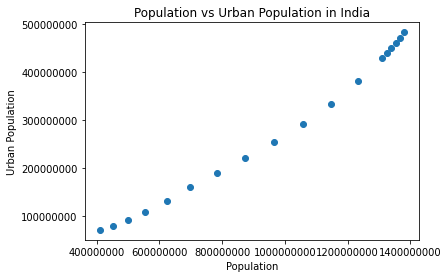

In [32]:
plt.scatter(df_india['Population'], df_india['Urban Population'])
plt.xlabel('Population')
plt.ylabel('Urban Population')
plt.title('Population vs Urban Population in India')
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

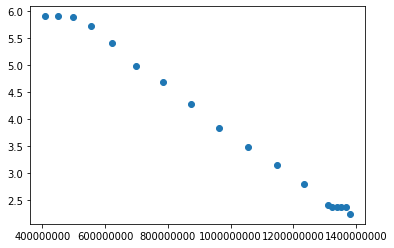

In [33]:
plt.scatter(df_india['Population'], df_india['Fertility Rate'])
plt.xlabel('Population')
plt.ylabel('Fertility Rate')
plt.title('Population vs Fertility Rate in India')
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

Hypothesis Testing

In [34]:
df4 = df[df['Country'] == 'Cuba']
df5 = df[df['Country'] == 'Hungary']

     Country  Fertility Rate
1476    Cuba            1.62
1477    Cuba            1.69
1478    Cuba            1.69
1479    Cuba            1.69
1480    Cuba            1.69
1481    Cuba            1.71
1482    Cuba            1.58
1483    Cuba            1.59
1484    Cuba            1.61
1485    Cuba            1.58
1486    Cuba            1.85
1487    Cuba            1.85
1488    Cuba            2.15
1489    Cuba            3.55
1490    Cuba            4.18
1491    Cuba            4.68
1492    Cuba            3.70
1493    Cuba            4.15
      Country  Fertility Rate
1674  Hungary            1.49
1675  Hungary            1.36
1676  Hungary            1.36
1677  Hungary            1.36
1678  Hungary            1.36
1679  Hungary            1.33
1680  Hungary            1.33
1681  Hungary            1.30
1682  Hungary            1.38
1683  Hungary            1.74
1684  Hungary            1.82
1685  Hungary            1.81
1686  Hungary            2.25
1687  Hungary            2.04

In [44]:
print('Cuba\'s Population Mean:', df4['Population'].mean())
print('Hungary\'s Population Mean:', df5['Population'].mean())

Cuba Population Mean: 10157871.166666666
Hungary Population Mean: 10082571.333333334


In [45]:
print('Cuba\'s Population Density Mean:', df4['Density (P/Km²)'].astype(float).mean())
print('Hungary\'s Population Density Mean:', df5['Density (P/Km²)'].astype(float).mean())

Cuba Population Density Mean: 95.44444444444444
Hungary Population Density Mean: 111.38888888888889


In [46]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

df6 = df.groupby('Country')
m = df[df['Country'] == 'Hungary']['Fertility Rate'].mean()
print('Hungary\'s Mean Fertility Rate:', m)

Hungary's Mean Fertility Rate: 1.7072222222222224


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


H0: mu = 1.7072222222222224

H1: mu != 1.7072222222222224

In [38]:
m0 = df[df['Country'] == 'Cuba']['Fertility Rate'].mean()
s0 = df[df['Country'] == 'Cuba']['Fertility Rate'].std()

print(m0, s0)

2.3644444444444446 1.1064634824107376


In [39]:
import math

m1 = 1.7072222222222224
s1 = 1.1064634824107376/math.sqrt(18)

print(m1, s1)

1.7072222222222224 0.26079594384930493


In [40]:
z = (m0-m1)/s1
print(z)

2.520063052061819


In [41]:
answer = 2*(1-0.9941)
print(answer)

0.011800000000000033

There is enough evidence against H0 that H0 can be rejected. Hence, the hypothesis that the mean Fertility Rate of Cuba over the years is equal to 1.707 is rejected.
